In [60]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

# leggo i CSV di ogni gruppo disciplinare
agrario = pd.read_csv('./dati/Agrario-Forestale e Veterinario.csv', sep=";", decimal=".", na_values=' ')
architettura = pd.read_csv('./dati/Architettura e Ingegneria civile.csv', sep=";", decimal=".", na_values=' ')
arte = pd.read_csv('./dati/Arte e Design.csv', sep=";", decimal=".", na_values=' ')
economia = pd.read_csv('./dati/Economico.csv', sep=";", decimal=".", na_values=' ')
formazione = pd.read_csv('./dati/Educazione e Formazione.csv', sep=";", decimal=".", na_values=' ')
giurisprudenza = pd.read_csv('./dati/Giuridico.csv', sep=";", decimal=".", na_values=' ')
informatica = pd.read_csv('./dati/Informatica e Tecnologie ICT.csv', sep=";", decimal=".", na_values=' ')
ingegneria = pd.read_csv("./dati/Ingegneria industriale e dell'informazione.csv", sep=";", decimal=".", na_values=' ')
lettere = pd.read_csv('./dati/Letterario-Umanistico.csv', sep=";", decimal=".", na_values=' ')
lingue = pd.read_csv('./dati/Linguistico.csv', sep=";", decimal=".", na_values=' ')
medicina = pd.read_csv('./dati/Medico-Sanitario e Farmaceutico.csv', sep=";", decimal=".", na_values=' ')
scienze_politiche = pd.read_csv('./dati/Politico-Sociale e Comunicazione.csv', sep=";", decimal=".", na_values=' ')
psicologia = pd.read_csv('./dati/Psicologico.csv', sep=";", decimal=".", na_values=' ')
scientifico = pd.read_csv('./dati/Scientifico.csv', sep=";", decimal=".", na_values=' ')
scienze_motorie = pd.read_csv('./dati/Scienze motorie e sportive.csv', sep=";", decimal=".", na_values=' ')
tutti = pd.read_csv('./dati/Tutte le facoltà.csv', sep=";", decimal=".", na_values=' ')

In [61]:
# Creo un unico dataframe contenente come colonne i gruppi disciplinari e come righe le informazioni relative (numero laureati...)
df = {
    'Agrario-Forestale e Veterinario': agrario["PROFILO DEI LAUREATI"],
    'Architettura e Ingegneria civile': architettura["PROFILO DEI LAUREATI"],
    'Arte e Design': arte["PROFILO DEI LAUREATI"],
    'Economico': economia["PROFILO DEI LAUREATI"],
    'Educazione e Formazione': formazione["PROFILO DEI LAUREATI"],
    'Giuridico': giurisprudenza["PROFILO DEI LAUREATI"],
    'Informatica e Tecnologie ICT': informatica["PROFILO DEI LAUREATI"],
    "Ingegneria industriale e dell'informazione": ingegneria["PROFILO DEI LAUREATI"],
    'Letterario-Umanistico': lettere["PROFILO DEI LAUREATI"],
    'Linguistico': lingue["PROFILO DEI LAUREATI"],
    'Medico-Sanitario e Farmaceutico': medicina["PROFILO DEI LAUREATI"],
    'Politico-Sociale e Comunicazione': scienze_politiche["PROFILO DEI LAUREATI"],
    'Psicologico': psicologia["PROFILO DEI LAUREATI"],
    'Scientifico': scientifico["PROFILO DEI LAUREATI"],
    'Scienze motorie e sportive': scienze_motorie["PROFILO DEI LAUREATI"]
    }
df = pd.DataFrame(df)
# tolgo la prima riga composta solo da valori null
df = df[1:]
# creo un dataframe trasposto, in modo da avere i gruppi disciplinari come righe e le informazioni relative come colonne
data = df.T

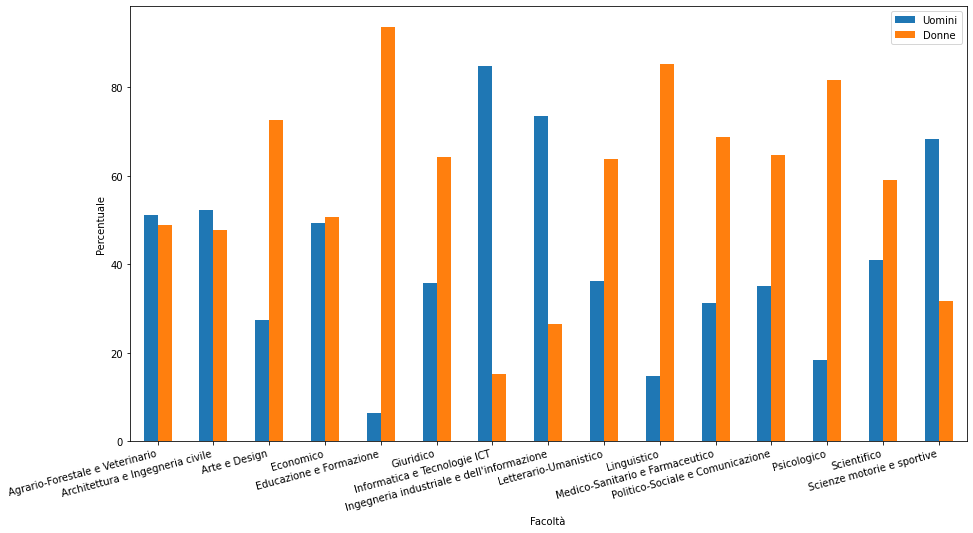

In [88]:
# Creare un file png con il plot
#plt.savefig('imagine.png', dpi=1200)

# Filtro i dati e li rendo adatti alla rappresentazione
genere = data[['Uomini', 'Donne']]
genere["Uomini"]=genere["Uomini"].str.replace(',','.')
genere["Donne"]=genere["Donne"].str.replace(',','.')
genere['Uomini'] = genere['Uomini'].astype(float)
genere['Donne'] = genere['Donne'].astype(float)
genere.plot(kind="bar",figsize=(15, 8))
plt.xlabel("Facoltà")
plt.ylabel("Percentuale")
plt.xticks(rotation=15, ha='right')
plt.show()
# plt.savefig('imagine.png', dpi=1200)

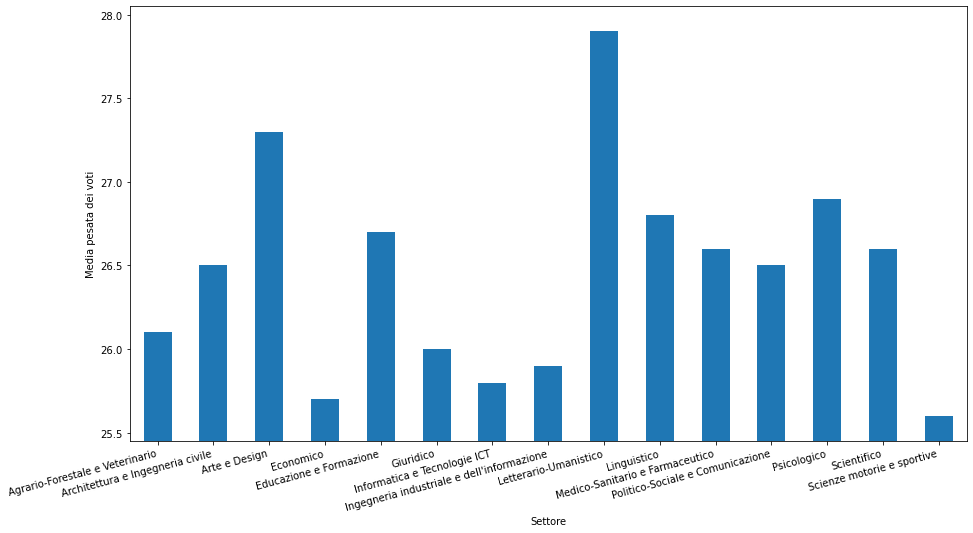

In [89]:
# estraggo solo i dati relativi alle medie per ogni gruppo disciplinare e li rendo adatti alla visualizzazione
epsilon = 0.15
media = data['Punteggio degli esami (medie, in 30-mi)�']
media =media.str.replace(',','.')
media = media.astype(float)
media.plot(kind="bar",figsize=(15, 8))
plt.xlabel("Settore")
plt.ylabel("Media pesata dei voti")
plt.xticks(rotation=15, ha='right')
plt.ylim(media.min() - epsilon, media.max() + epsilon)
plt.show()
#plt.savefig('media.png', dpi=1200)

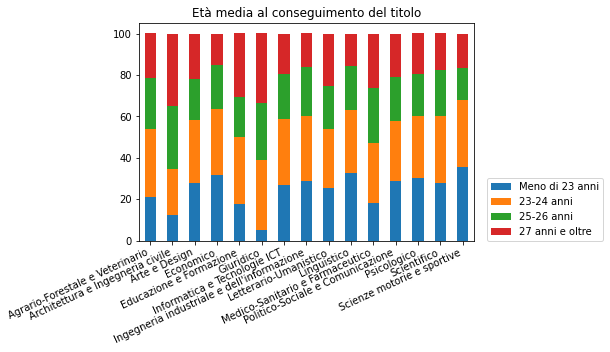

In [90]:
# per ogni gruppo disciplinare considero solo le percentuali di studenti che completano gli studi nelle fasce di età: [:23), [23:24], [25,26], [27:)
eta_laurea = data[['Meno di 23 anni', '23-24 anni', '25-26 anni', '27 anni e oltre']]
eta_laurea["Meno di 23 anni"]=eta_laurea["Meno di 23 anni"].str.replace(',','.')
eta_laurea["23-24 anni"]=eta_laurea["23-24 anni"].str.replace(',','.')
eta_laurea["25-26 anni"]=eta_laurea["25-26 anni"].str.replace(',','.')
eta_laurea["27 anni e oltre"]=eta_laurea["27 anni e oltre"].str.replace(',','.')
eta_laurea['Meno di 23 anni'] = eta_laurea['Meno di 23 anni'].astype(float)
eta_laurea['23-24 anni'] = eta_laurea['23-24 anni'].astype(float)
eta_laurea['25-26 anni'] = eta_laurea['25-26 anni'].astype(float)
eta_laurea['27 anni e oltre'] = eta_laurea['27 anni e oltre'].astype(float)

eta_laurea.plot(kind='bar', stacked=True)
plt.title("Età media al conseguimento del titolo")
l2 = plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
plt.xticks(rotation=25, ha='right')
plt.show()
#plt.savefig("test.png", bbox_inches='tight', transparent=True, pad_inches=0, dpi=2200)

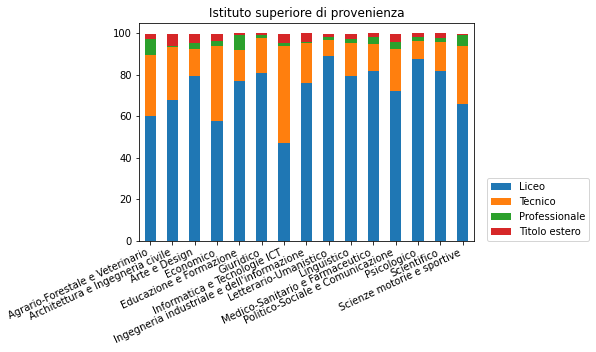

In [91]:
# ora invece considero le provenienze: liceo, istituto tecnico, istituto professionale o titolo estero
istituto_superiore = data[['Liceale', 'Tecnico', 'Professionale', 'Titolo estero']]
istituto_superiore["Liceale"]=istituto_superiore["Liceale"].str.replace(',','.')
istituto_superiore["Tecnico"]=istituto_superiore["Tecnico"].str.replace(',','.')
istituto_superiore["Professionale"]=istituto_superiore["Professionale"].str.replace(',','.')
istituto_superiore["Titolo estero"]=istituto_superiore["Titolo estero"].str.replace(',','.')
istituto_superiore['Liceale'] = istituto_superiore['Liceale'].astype(float)
istituto_superiore['Tecnico'] = istituto_superiore['Tecnico'].astype(float)
istituto_superiore['Professionale'] = istituto_superiore['Professionale'].astype(float)
istituto_superiore['Titolo estero'] = istituto_superiore['Titolo estero'].astype(float)
mylabels = ['Liceo', 'Tecnico', 'Professionale', 'Titolo estero']

istituto_superiore.plot(kind='bar', stacked=True)
plt.title("Istituto superiore di provenienza")
l2 = plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
l2.get_texts()[0].set_text('Liceo')
plt.xticks(rotation=25, ha='right')
plt.show()
#plt.savefig("provenienza.png", bbox_inches='tight', transparent=True, pad_inches=0, dpi=2200)

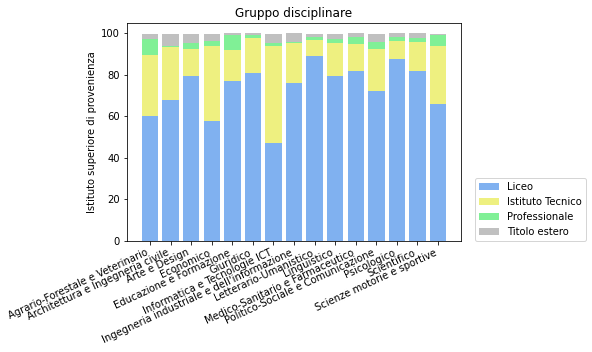

In [92]:
# Stesso grafico di prima ma migliorato in termini di larghezza delle colonne e colori (liceo associato all'azzurro ecc...)
istituto_superiore.rename(columns = {'Titolo estero':'Estero'}, inplace = True)
fig, ax = plt.subplots()
ax.bar(istituto_superiore.index, istituto_superiore.Liceale, label = "Liceo", color = "#80b1f0")
ax.bar(istituto_superiore.index, istituto_superiore.Tecnico, label = "Istituto Tecnico", color = "#eef080", bottom=istituto_superiore.Liceale)
ax.bar(istituto_superiore.index, istituto_superiore.Professionale, label = "Professionale", color = "#80f096", bottom=(istituto_superiore.Liceale+istituto_superiore.Tecnico))
ax.bar(istituto_superiore.index, istituto_superiore.Estero, label = "Titolo estero", color = "#C0C0C0", bottom=(istituto_superiore.Liceale+istituto_superiore.Tecnico+istituto_superiore.Professionale))


ax.set_ylabel('Istituto superiore di provenienza')
ax.set_title('Gruppo disciplinare')
ax.legend()

l2 = plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
plt.xticks(rotation=25, ha='right')
plt.show()
#plt.savefig("provenienza2.png", bbox_inches='tight', transparent=True, pad_inches=0, dpi=2200)

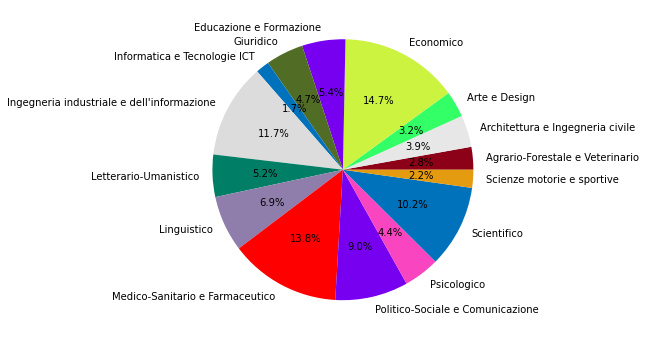

In [95]:
# Torta numero assoluto di laureati per gruppo disciplinare, confronto su quali sono le facoltà più frequentate e quali meno
num_laureati = data['Numero di laureati']
num_laureati = num_laureati.astype(int)
num_laureati.plot.pie(subplots=True,
                      figsize=(11, 6),
                      colors=['#8c0118', '#e7e7e7', '#33ff66', '#cbf340', '#7800f0', '#516c24', '#0072bb', '#dcdcdc', '#007f66', '#8f7eab', '#ff0000', '#7800f0', '#f945c0', '#0072bb', '#e49b0f'],
                      shadow=False,
                      autopct='%1.1f%%')
plt.ylabel('')
plt.show()
#plt.savefig("num_studenti.png", bbox_inches='tight', transparent=True, pad_inches=0, dpi=2200)

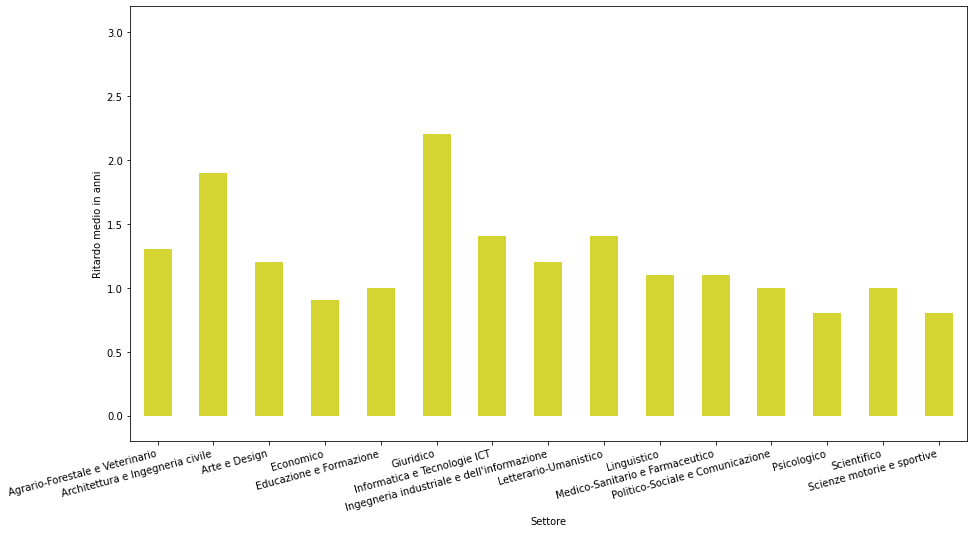

In [97]:
# grafico a barre che mostra il ritardo medio per gruppo disciplinare
termine = data['Ritardo alla laurea (medie, in anni)�']
epsilon = 1
termine =termine.str.replace(',','.')
termine = termine.astype(float)
termine.plot(kind="bar",figsize=(15, 8), color=['#d4d433'])
plt.xlabel("Settore")
plt.ylabel("Ritardo medio in anni")
plt.xticks(rotation=15, ha='right')
plt.ylim(termine.min() - epsilon, termine.max() + epsilon)
plt.show()
#plt.savefig("termine.png", bbox_inches='tight', transparent=True, pad_inches=0, dpi=2200)

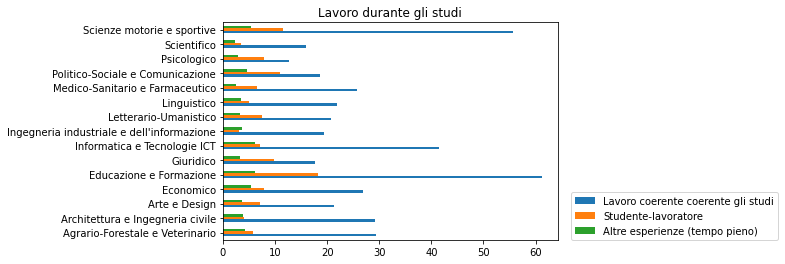

In [98]:
# lavoro durate gli studi per gruppo disciplinare, si analizzano la percentuale di studenti che hanno avuto esperienze coerenti con gli studi
# oppure sono studenti lavoratori o altre esperienze
lavoro = data[['Lavoro coerente con gli studi (per 100 che hanno avuto esperienze di lavoro)', 'Lavoratori-studenti', 'Altre esperienze di lavoro con continuit� a tempo pieno']]
lavoro.rename(columns = {'Lavoro coerente con gli studi (per 100 che hanno avuto esperienze di lavoro)':'coer', 'Lavoratori-studenti':'ls', 'Altre esperienze di lavoro con continuit� a tempo pieno':'esp'}, inplace = True)

lavoro.coer=lavoro.coer.str.replace(',','.')
lavoro.ls=lavoro.ls.str.replace(',','.')
lavoro.esp=lavoro.esp.str.replace(',','.')
lavoro.coer = lavoro.coer.astype(float)
lavoro.ls = lavoro.ls.astype(float)
lavoro.esp = lavoro.esp.astype(float)

ax = lavoro.plot.barh()
ax.set_title('Lavoro durante gli studi')
l2 = plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
l2.get_texts()[0].set_text('Lavoro coerente coerente gli studi')
l2.get_texts()[1].set_text('Studente-lavoratore')
l2.get_texts()[2].set_text('Altre esperienze (tempo pieno)')
#plt.savefig("lavoro.png", bbox_inches='tight', transparent=True, pad_inches=0, dpi=2200)